# Importing

In [2]:
import matplotlib.colors as colors
import pylab
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import math
import os
import scipy.special as sp
import scipy.integrate as integrate
import scipy.misc as ms
from matplotlib import gridspec
from numpy import linalg as LA
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, mark_inset)
import warnings
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colorbar import Colorbar
from matplotlib.colors import LogNorm
from matplotlib.colors import TwoSlopeNorm
import matplotlib as mpl
from PIL import Image
from scipy.stats import circmean
from scipy.stats import circstd
from scipy import stats

/tmp/ipykernel_664121/162563480.py:11: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  import scipy.misc as ms


In [3]:
import matplotlib as mpl

pgf_with_latex = {                      # setup matplotlib to use LaTeX for output
    #"pgf.texsystem": "pdflatex",        # change this if using xetex or lualatex
    #"text.usetex": True,                # use LaTeX to write all text
    #"font.family": "serif",
    #"font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    #"font.sans-serif": [],
    #"font.monospace": [],
    "axes.labelsize": 18,               # LaTeX default is 10pt font.
    #"text.fontsize": 18,
    "legend.fontsize": 15,              # Make the legend/label fonts a little smaller
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "pgf.preamble": "\n".join([
        r"\usepackage{bm}",  
        r"\usepackage[utf8]{inputenc}",    # use utf8 fonts because your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{amsmath}"
    ])
}

mpl.rcParams.update(pgf_with_latex)

In [ ]:
cd Data

# Helper functions

In [4]:
def angle_differences(angles1, angles2):
    """
    Calculate the differences between corresponding angles in two arrays.

    Args:
    angles1 (array-like): First array of angles in radians.
    angles2 (array-like): Second array of angles in radians (must have the same length as angles1).

    Returns:
    np.ndarray: An array of differences between corresponding angles in the range -π to π.
    """
    complex1 = np.exp(1j * angles1)
    
    complex2 = np.exp(1j * angles2)
    diff_complex = complex1 / complex2
    return np.angle(diff_complex)

In [5]:
def rotation_rate1(filename):
    time, POP, NOP, angle = np.loadtxt(filename, unpack = True)  # Load the data from the text file
    index = np.argmax(NOP > 0.7)
    angle_diffs = np.zeros(0)
    time_diffs = np.zeros(0)
    new_angle = np.zeros(0)
    time_rescale = 15.5
    new_time = np.zeros(0)
    diff = 4
    
    # time_diffs = np.diff(time[index:])/time_rescale

    if NOP[index] > 0.7:
        k = index
        for j in range(len(time)-index-diff):
            diff_time = (time[k+diff] - time[k])/time_rescale
            diff_angle = angle_differences(angle[k+diff],angle[k])
            
            new_time = np.append(new_time,time[k+diff]/time_rescale)
            new_angle = np.append(new_angle,angle[k+diff])
            angle_diffs = np.append(angle_diffs, diff_angle)
            time_diffs = np.append(time_diffs,diff_time)
            k += 1
        angular_velocity = angle_diffs / (time_diffs)
        return  new_time, new_angle, angular_velocity
    else:
        return -1

def remove_outliers_zscore(angular_velocity, time, threshold=2):
    z_scores = np.abs(stats.zscore(angular_velocity))
    non_outliers = np.where(z_scores <= threshold)[0]
    return time[non_outliers], angular_velocity[non_outliers]

In [6]:
def Plotting_iso_start(kappa):
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    time_rescale = 15.5
    fig, ax1 = plt.subplots(1, figsize=(6, 5))
    left, bottom, width, height = [0.48, 0.42, 0.4, 0.35]
    ax2 = fig.add_axes([left, bottom, width, height])

    # Just for Case0, although it's not plotted
    write = "Ckappa_" + kappa + "Case0"
    time, POP, NOP, angle = np.loadtxt(write, unpack=True)

    for j in range(3):
        write = "Ckappa_" + kappa + "Case" + str(j)
        time, POP, NOP, angle = np.loadtxt(write, unpack=True)

        POP = np.delete(POP, 0)
        NOP = np.delete(NOP, 0)
        angle = np.delete(angle, 0)
        time = np.delete(time, 0)

        time1, angle1, angular_velocity = rotation_rate1(write)
        time2, cleaned_rates = remove_outliers_zscore(angular_velocity, time1)

        ax1.plot(time / time_rescale, POP, color='teal', alpha=0.8)
        ax2.plot(time2, np.degrees(cleaned_rates), color=colors[j], label=f'run {j + 1}')
        ax1.plot(time / time_rescale, NOP, color='grey')

    ax1.plot(time / time_rescale, NOP, color='grey', label=r"Nematic order $S$")
    ax1.plot(time / time_rescale, POP, color='teal', alpha=0.8, label=r"Polar order $P$")

    ax1.set_ylim([0, 1])
    ax2.set_ylim([-0.55, 0.4])
    ax1.set_ylabel("Order parameter")
    ax1.set_xlabel(r"$\tilde{t}$")

    ax2.set_xlabel(r"$\tilde{t}$")
    ax2.set_ylabel(r"$ \omega$ $(\degree/ \tilde{T}$ )")
    ax2.axhline(y=0.0, color='black', linestyle='-')
    ax1.legend(loc=5, bbox_to_anchor=(0.66, 0.2))
    ax2.legend(fontsize=11, ncol=2)

    plt.show()

# Fig 2E

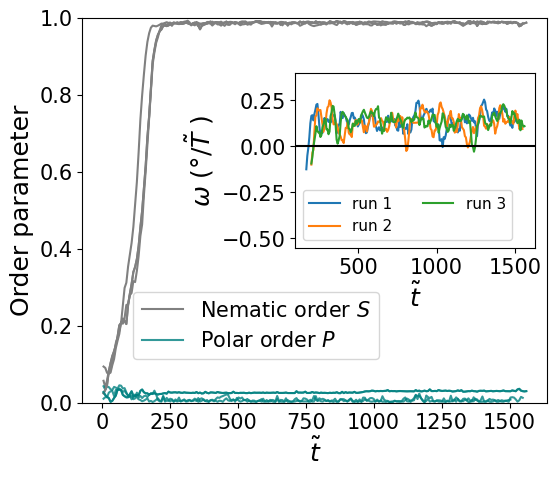

In [53]:
kappa = "300" #Ues 300 for Fig2E and 100 for Fig3B
Plotting_iso_start(kappa)

# Fig 3B

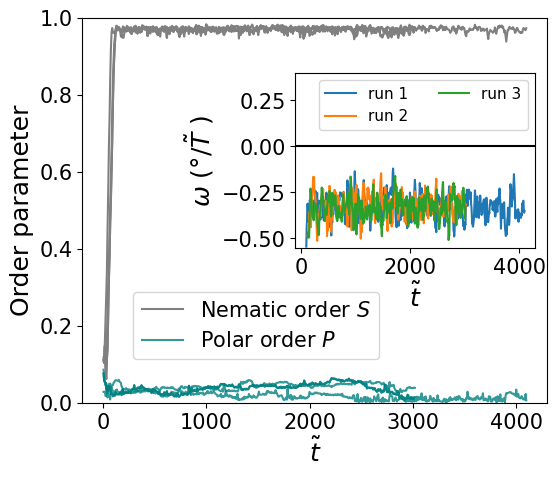

In [7]:
kappa = "100"
Plotting_iso_start(kappa)

# Fig 3C

In [9]:
# === Helper function ===
def compute_phi_vs_rotation(phi_label, kappa_sublist):
    means = []
    stds = []
    for kappa_val in kappa_sublist:
        combined_rates = []
        for run in range(3):
            filename = f"Ckappa{phi_label}{kappa_val}Case{run}"
            time, angle, angular_velocity = rotation_rate1(filename)
            _, cleaned_rates = remove_outliers_zscore(angular_velocity, time)
            combined_rates.extend(cleaned_rates)
        means.append(np.mean(combined_rates))
        stds.append(np.std(combined_rates))
    return np.array(means), np.array(stds)

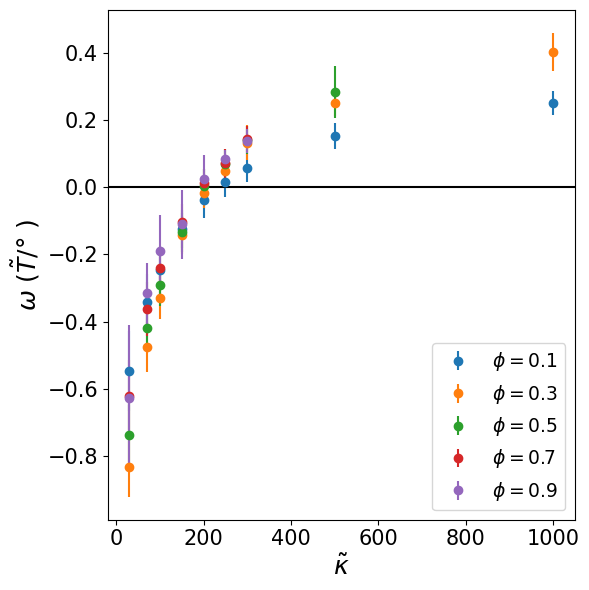

In [10]:
# Define values
kappa_values = [30, 70, 100, 150, 200, 250, 300, 500, 1000]
phi_values = [0.1, 0.3, 0.5, 0.7, 0.9]
phi_suffixes = ['_B01_', '_', '_B05_', '_B07_', '_B09_']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
begin_index = [0, 0, 0, 0, 0]
end_index = [8, 8, 7, 6, 6]

# === Plotting ===
fig, ax = plt.subplots(figsize=(6, 6))

for idx, phi_label in enumerate(phi_suffixes):
    start = begin_index[idx]
    end = end_index[idx] + 1
    kappa_subset = kappa_values[start:end]

    mean_rates, std_rates = compute_phi_vs_rotation(phi_label, kappa_subset)

    ax.errorbar(
        kappa_subset,
        np.degrees(mean_rates),
        yerr=np.degrees(std_rates),
        fmt='o',
        label=fr'$\phi = {phi_values[idx]}$',
        color=colors[idx],
        markerfacecolor=colors[idx]
    )

# === Plot formatting ===
ax.set_xlabel(r'$\tilde{\kappa}$')
ax.set_ylabel(r"$\omega$ $ ( \tilde{T}/\degree$ )")
ax.axhline(y=0.0, color='black', linestyle='-')
ax.legend(loc='lower right', fontsize=13.5)
plt.tight_layout()
plt.show()

# Fig 5F

([<matplotlib.axis.YTick at 0x15551570fa00>,
 [Text(0, 100, '30'),
  Text(0, 200, '70'),
  Text(0, 300, '100'),
  Text(0, 400, '150'),
  Text(0, 500, '200'),
  Text(0, 600, '250'),
  Text(0, 700, '300'),
  Text(0, 800, '500'),
  Text(0, 900, '1000')])

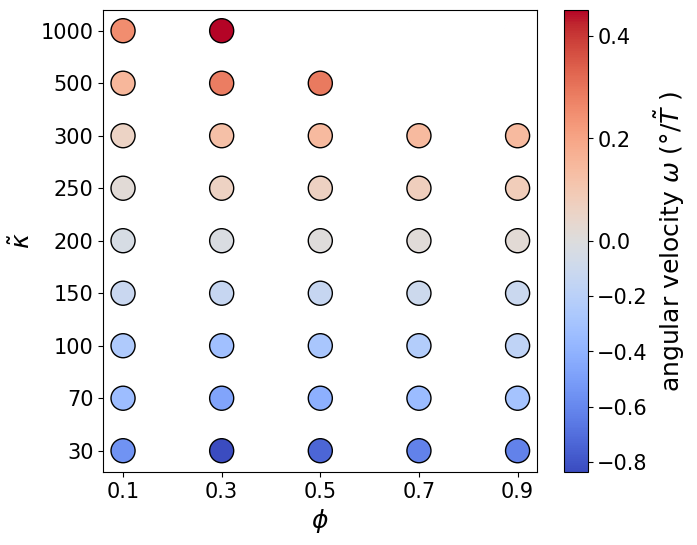

In [14]:
# Create a sample 2D array (replace with your data)

fig, (ax1) = plt.subplots(1, figsize=(7,6))
x = [0.1, 0.3, 0.5, 0.7, 0.9]
y = [100,200,300,400,500,600,700,800,900]


# Create the scatter plot with colors based on array values
flat_array = np.loadtxt('phase_diagram3.txt')
result_array = flat_array.reshape((9, 5, 2))
result_array[:,:,0]
xx, yy = np.meshgrid(x, y)

cmap = plt.get_cmap('coolwarm')


norm = TwoSlopeNorm(vcenter=0)

plt.scatter(xx, yy, c=result_array[:,:,0],norm=norm, cmap=cmap, s=300, marker='o',edgecolor='k' )

# Add a color bar to represent the values
cbar = plt.colorbar()
cbar.set_label(r"angular velocity $\omega$ $ (\degree/ \tilde{T}$ )")

zero_indices = np.argwhere(result_array[:,:,0] == 0)
for idx in zero_indices:
    plt.scatter(xx[idx[0], idx[1]], yy[idx[0], idx[1]], c='white', s=450, marker='o')
    

# Add axis labels
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\tilde{\kappa}$')

custom_xticks = [0.1, 0.3, 0.5, 0.7, 0.9]
custom_xtick_labels = ['0.1', '0.3', '0.5', '0.7', '0.9']

plt.xticks(custom_xticks, custom_xtick_labels)

custom_yticks = [100,200,300,400,500,600,700,800,900]
custom_ytick_labels = ['30','70','100','150','200','250','300','500','1000']
plt.yticks(custom_yticks, custom_ytick_labels)
# plt.legend(loc = 'upper right', fontsize='11')
# plt.savefig('Phase_diagram', dpi=300,bbox_inches = "tight")

# Same data from Fig3C but plotted differently

In [11]:
# === Helper Function ===
def compute_rotation_vs_phi_for_kappa(kappa_val, phi_values, phi_suffixes):
    means = []
    stds = []
    for phi_idx, phi in enumerate(phi_values):
        phi_label = phi_suffixes[phi_idx]
        combined_rates = []

        for run in range(3):
            filename = f"Ckappa{phi_label}{kappa_val}Case{run}"
            time, angle, angular_velocity = rotation_rate1(filename)
            _, cleaned_rates = remove_outliers_zscore(angular_velocity, time)
            combined_rates.extend(cleaned_rates)

        means.append(np.mean(combined_rates))
        stds.append(np.std(combined_rates))

    return np.array(means), np.array(stds)

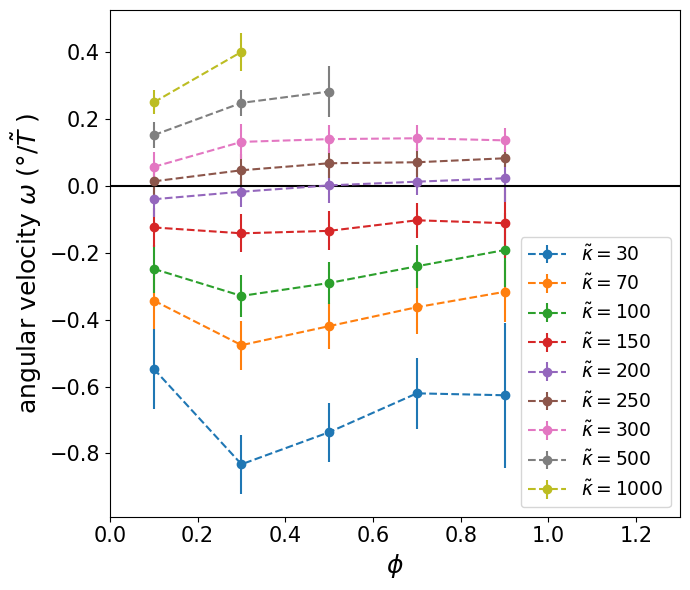

In [12]:
# === Input Data ===
kappa_values = [30, 70, 100, 150, 200, 250, 300, 500, 1000]
phi_values_all = [0.1, 0.3, 0.5, 0.7, 0.9]
phi_suffixes = ['_B01_', '_', '_B05_', '_B07_', '_B09_']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
end_index = [5, 5, 5, 5, 5, 5, 5, 3, 2]  # number of phi values for each kappa

# === Plotting ===
fig, ax = plt.subplots(figsize=(7, 6))

for idx, kappa_val in enumerate(kappa_values):
    limit = end_index[idx]
    phi_vals_kappa = phi_values_all[:limit]
    suffixes_kappa = phi_suffixes[:limit]

    mean_rates, std_rates = compute_rotation_vs_phi_for_kappa(kappa_val, phi_vals_kappa, suffixes_kappa)

    ax.errorbar(phi_vals_kappa,
                np.degrees(mean_rates),
                yerr=np.degrees(std_rates),
                fmt='o--',
                label=fr'$\tilde{{\kappa}} = {kappa_val}$',
                color=colors[idx],
                markerfacecolor=colors[idx])

# === Plot formatting ===
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r"angular velocity $\omega$ $ (\degree/ \tilde{T}$ )")
ax.set_xlim([0, 1.3])
ax.axhline(y=0.0, color='black', linestyle='-')
ax.legend(loc='lower right', fontsize=13.5)
plt.tight_layout()
plt.show()